In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
RGB_wide = pickle.load(open('RGB_wide.pickle', 'rb'))
RGB_labels = pickle.load(open('RGB_labels.pickle', 'rb'))
all_wide = pickle.load(open('all_channels_wide.pickle', 'rb'))
all_labels = pickle.load(open('all_channels_labels.pickle', 'rb'))

In [6]:
print(type(RGB_wide), type(RGB_labels), type(all_wide), type(all_labels))
print(RGB_wide.shape, len(RGB_labels), all_wide.shape, len(all_labels))

<class 'numpy.ndarray'> <class 'list'> <class 'numpy.ndarray'> <class 'list'>
(27000, 12288) 27000 (27000, 53248) 27000


In [7]:
RGB_wide_center = RGB_wide - RGB_wide.mean()
RGB_labels = np.asarray(RGB_labels)
type(RGB_labels)

numpy.ndarray

In [8]:
X_train, X_test, y_train, y_test = train_test_split(RGB_wide_center, RGB_labels, test_size = 0.2, 
                                                    random_state = 423, stratify = RGB_labels)

In [15]:
def plot_PCA_2D(df, groups, group_labels, file = None, 
                n_components = 2, random_state = None):
    """
    Takes a centered DataFrame or array, conducts a principal components
    analysis (PCA), and plots the scores of the first two components colored
    by input group labels. Axis labels display the percentage of variance 
    explained by each component.

    Parameters
    ----------
    df: DataFrame or ndarray
    groups: Series or ndarray
        The groups to color the scores by
        length must equal df.shape[0]
    group_labels: one-dimensional array
        The unique labels for the groups
    file: string, default: None
        Filename to save plot output with
    n_components: int, default: 2
        The number of principal components to keep
    random_state: int, default: None

    Returns
    -------
    scatterplot
        scores plot of PC2 vs. PC1 colored by group_labels  
    """

    import matplotlib.pyplot as plt
    from itertools import cycle

    pca = PCA(n_components = n_components, random_state = random_state)
    pca.fit(df)
    scores = pca.transform(df)
    perc_var_explained = pca.explained_variance_ratio_

    colors = cycle(['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'w', 'aqua', 
                    'yellow', 'black', 'brown'])
    plt.figure(figsize = (12, 10))
    for c, label in zip(colors, group_labels):
        plt.scatter(scores[groups == label, 0], scores[groups == label, 1],
                    c = c, label = label, edgecolors = 'gray')
    plt.xlabel('PC1 ({}% Variance)'.format((100 * perc_var_explained[0])\
                .round(2)), fontsize = 15)
    plt.ylabel('PC2 ({}% Variance)'.format((100 * perc_var_explained[1])\
                .round(2)), fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend()

    if file:
        plt.savefig(file, dpi = 100, bbox_inches = 'tight')
    plt.show()
    plt.close()

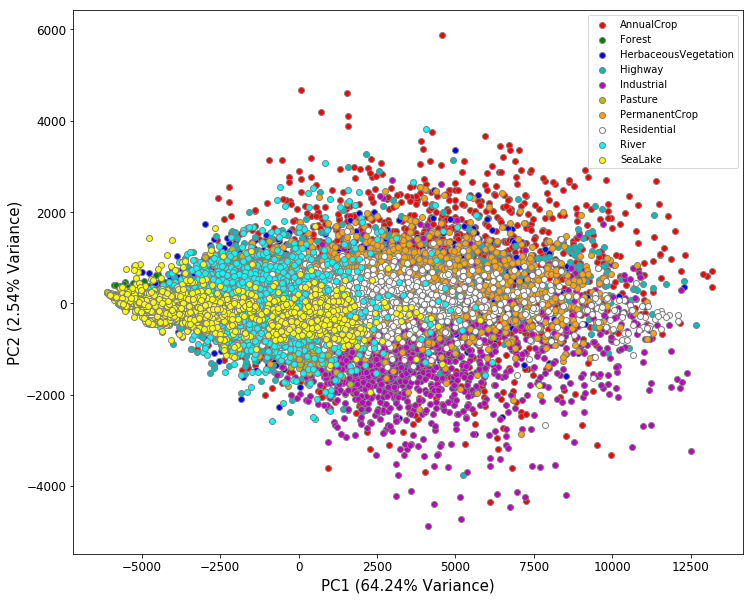

In [16]:
plot_PCA_2D(X_train, y_train, np.unique(y_train), random_state = 423)

In [27]:
RGB_pca = PCA(n_components = 500, random_state = 423).fit(X_train)
RGB_pca_scores = RGB_pca.transform(X_train)

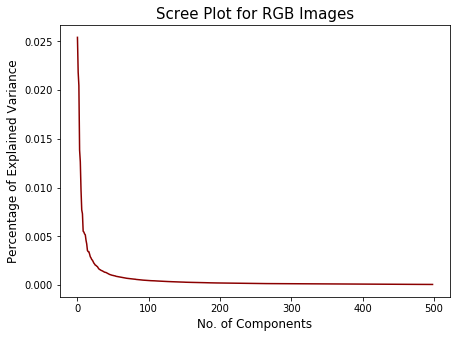

In [28]:
plt.figure(figsize = (7, 5))
plt.plot(RGB_pca.explained_variance_ratio_[1:], color = 'darkred')
plt.xlabel('No. of Components', fontsize = 12)
plt.ylabel('Percentage of Explained Variance', fontsize = 12);
plt.title('Scree Plot for RGB Images', fontsize = 15)
plt.show()
plt.close()

In [35]:
np.min(np.where(np.cumsum(RGB_pca.explained_variance_ratio_) >= 0.9))

118

In [47]:
RGB_pca_scores.shape

(21600, 500)

In [ ]:
# test change